# Importing libraries

In [9]:
import cv2
import os 
import tensorflow as tf 
import matplotlib.pyplot  as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from tensorflow import keras
from PIL import Image
import numpy as np 
from sklearn.model_selection import train_test_split


In [10]:
image_directory = '../data/Training/'

no_tumor_images = os.listdir(image_directory+'no_tumor/')
yes_tumor_images = os.listdir(image_directory+'pituitary_tumor/')
dataset = []
label = []



for i,image_name in enumerate(no_tumor_images):
    image = cv2.imread(image_directory+'no_tumor/'+image_name)
    image = Image.fromarray(image,'RGB')
    image = image.resize((64,64))
    dataset.append(np.array(image))
    label.append(0)
    
for i,image_name in enumerate(yes_tumor_images):
    image = cv2.imread(image_directory+'pituitary_tumor/'+image_name)
    image = Image.fromarray(image,'RGB')
    image = image.resize((64,64))
    dataset.append(np.array(image))
    label.append(1)
    
    

In [11]:
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import  Activation,Dropout,Flatten,Dense

In [12]:
dataset=np.array(dataset)
label = np.array(label)

xtrain,xtest,ytrain,ytest = train_test_split(dataset,label,test_size=0.2,random_state=0)

print(xtrain.shape)

(977, 64, 64, 3)


In [13]:
# Reshape=(n,image_width,image_height,n_channel)

print(xtest.shape)

(245, 64, 64, 3)


In [14]:
xtrain= normalize(xtrain,axis = 1)
xtest = normalize(xtest , axis = 1) 


In [15]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model = Sequential()
model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model = Sequential()
model.add(Conv2D(64,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [16]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics =['accuracy'])
history = model.fit(xtrain,ytrain,batch_size=16,verbose=1,epochs=10,validation_data=(xtest,ytest),shuffle=False,validation_split=0.33)

#model.save('BrainTumourTrainingModel.h5')

Epoch 1/10
62/62 [==============================] - 7s 93ms/step - loss: 0.5368 - accuracy: 0.7840 - val_loss: 0.1665 - val_accuracy: 0.9673
Epoch 2/10
62/62 [==============================] - 5s 87ms/step - loss: 0.1537 - accuracy: 0.9417 - val_loss: 0.0741 - val_accuracy: 0.9714
Epoch 3/10
62/62 [==============================] - 5s 88ms/step - loss: 0.0761 - accuracy: 0.9785 - val_loss: 0.0518 - val_accuracy: 0.9796
Epoch 4/10
62/62 [==============================] - 5s 88ms/step - loss: 0.0555 - accuracy: 0.9826 - val_loss: 0.0539 - val_accuracy: 0.9837
Epoch 5/10
62/62 [==============================] - 5s 88ms/step - loss: 0.0367 - accuracy: 0.9898 - val_loss: 0.0278 - val_accuracy: 0.9837
Epoch 6/10
62/62 [==============================] - 5s 88ms/step - loss: 0.0394 - accuracy: 0.9887 - val_loss: 0.0492 - val_accuracy: 0.9837
Epoch 7/10
62/62 [==============================] - 5s 87ms/step - loss: 0.0274 - accuracy: 0.9918 - val_loss: 0.0426 - val_accuracy: 0.9878
Epoch 8/10
62

In [17]:
print(history.history.keys())
model.summary()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 activation_7 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 61504)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                3936320   
                                                                 
 activation_8 (Activation)   (None, 64)                0    

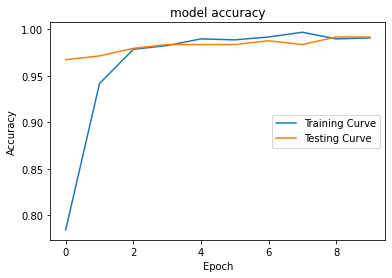

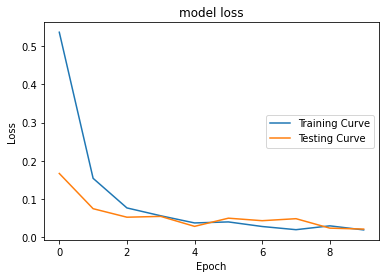

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Curve', 'Testing Curve'], loc='center right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Curve', 'Testing Curve'], loc='center right')
plt.show()

In [19]:
score, acc = model.evaluate(xtest, ytest,verbose=1, batch_size= 16)
print('test accuracy:', acc)

predict_x=model.predict(xtest) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

16/16 [==============================] - 0s 16ms/step - loss: 0.0206 - accuracy: 0.9918
test accuracy: 0.9918367266654968
8/8 [==============================] - 0s 23ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:


image = cv2.imread('../data/Testing/pituitary_tumor/image(3).jpg')

img = Image.fromarray(image)
img = img.resize((64,64))

img = np.array(img)



print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [4 4 4]
  [4 4 4]
  [4 4 4]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]

 ...

 [[7 7 7]
  [8 8 8]
  [9 9 9]
  ...
  [5 5 5]
  [4 4 4]
  [5 5 5]]

 [[4 4 4]
  [6 6 6]
  [7 7 7]
  ...
  [6 6 6]
  [5 5 5]
  [5 5 5]]

 [[0 0 0]
  [1 1 1]
  [1 1 1]
  ...
  [6 6 6]
  [3 3 3]
  [2 2 2]]]


In [21]:
input_img = np.expand_dims(img,axis = 0)
predict_x=model.predict(input_img) 
classes_x=np.argmax(predict_x,axis=1)

result = (model.predict(input_img)>0.5).astype("int32")
print(result)
print(classes_x)
#actual = np.argmax(ytest,axis = 1)

1/1 [==============================] - 0s 29ms/step
[[1]]
[0]


In [22]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

1/1 [==============================] - 0s 37ms/step


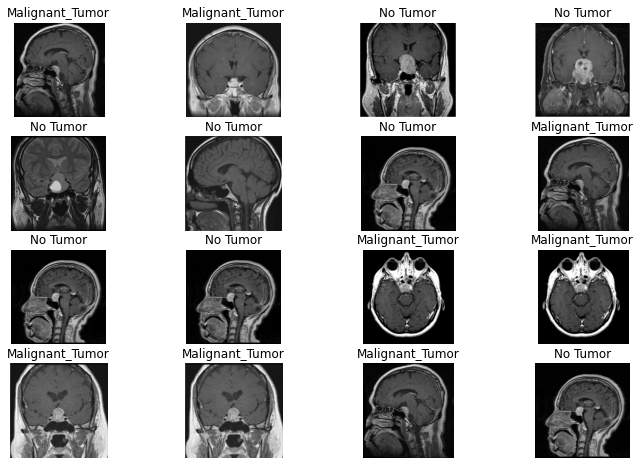

In [23]:
plt.figure(figsize=(12,8)) 
p = os.listdir('../data/Testing/')
c = 1
for  i in os.listdir('../data/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread('../data/Testing/pituitary_tumor/'+i)
    img1 = Image.fromarray(img)
    img1 = img1.resize((64,64))
    img1 = np.array(img1)
    input_img=np.expand_dims(img1,axis = 0)
    p =(model.predict(input_img)>0.5).astype("int32") 
    if(p==[[1]]):
        plt.title('Malignant_Tumor')
    else:
        plt.title('No Tumor')
    plt.imshow(img,cmap = 'gray')
    plt.axis('off')
    c += 1

1/1 [==============================] - 0s 28ms/step


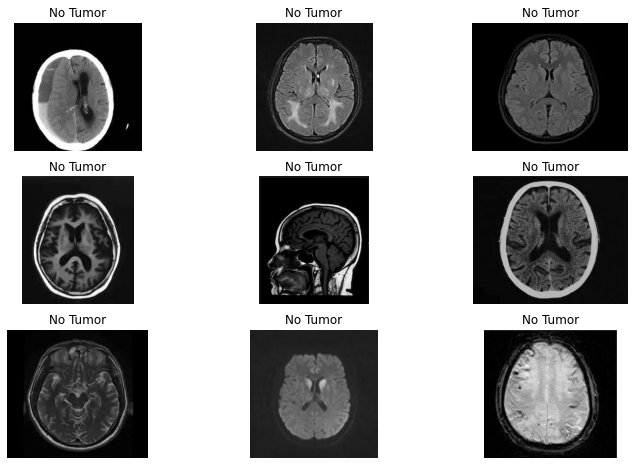

In [24]:
plt.figure(figsize=(12,8)) 
p = os.listdir('../data/Testing/')
c = 1
for  i in os.listdir('../data/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('../data/Testing/no_tumor/'+i)
    img1 = Image.fromarray(img)
    img1 = img1.resize((64,64))
    img1 = np.array(img1)
    input_img=np.expand_dims(img1,axis = 0)
    p =(model.predict(input_img)>0.5).astype("int32") 
    if(p==[[1]]):
        plt.title('Pituitary_Tumor')
    else:
        plt.title('No Tumor')
    plt.imshow(img,cmap = 'gray')
    plt.axis('off')
    c += 1

NameError: name 'xxzxz' is not defined